# Notebook 3: The Best and the Worst Properties of 2017

This part of my analysis will work to create my article about the best and worst buildings in terms of energy efficiency in Philly.

My goals for this article include:
* Figure out which buildings are the most and least efficient
* Create a list for my article of them that people can search to see if there building is good or bad
* Plot the good and bad onto a map
* Analyze property type and year built of the good and the bad to see if there is a story there

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import glob

#import energy usage data of Philadelphia's buildings from 2013-2017
yr2013_df = pd.read_csv('../data/energy_usage_large_commercial_buildings_reported_2013.csv')
yr2014_df = pd.read_csv('../data/energy_usage_large_commercial_buildings_reported_2014.csv')
yr2015_df = pd.read_csv('../data/properties_reported_2015.csv')
yr2016_df = pd.read_csv('../data/properties_reported_2016.csv')
yr2017_df = pd.read_csv('../data/properties_reported_2017.csv')

## Primary Analysis: Energy Star Best and Worst
First, I begin by looking into the Energy STAR scores of the buildings reported in 2017.

In [2]:
#to find the average score
yr2017_df['energy_star_score'].mean()

58.959280303030305

In [3]:
#to find the max score
yr2017_df['energy_star_score'].max()

100.0

In [4]:
# to find the min score
yr2017_df['energy_star_score'].min()

1.0

### Analysis 1: The Best: Buildings w/ 100 Score

First, I want to see which buildings have the top energy STAR score of 100


In [5]:
yr2017_df[(yr2017_df['energy_star_score'] == 100)]

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,portfolio_manager_id,natural_gas_use_kbtu,fuel_oil_o2_use_kbtu,steam_use_kbtu,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes
2,NaN,4573,4343 WHITAKER AVE,ECI Building,884184500,19124,1,1950,Distribution Center,93000.0,3956329,663312.3,NaN,NaN,100.0,7.1,7.5,68.1,35.2,NaN
12,407853.4,3192,1330 VERNON RD,St. Raymond of Penafort,775329000,19150,2,1950,K-12 School,61900.0,3736431,NaN,NaN,NaN,100.0,6.6,20.7,953.6,45.2,NaN
132,68185.4,3153,403 W SPRINGFIELD AVE,Chestnut Hill,775535510,19118,1,1900,K-12 School,220000.0,3881814,9026747.9,536902.8,NaN,100.0,43.8,46.5,5.4,526.9,NaN
184,1646611.4,3559,1001 W LUZERNE ST,Little Flower Catholic High School,777247000,19140,2,1939,K-12 School,184000.0,3773988,880446.2,0.0,NaN,100.0,13.7,33.1,2085.7,229.4,NaN
210,31767644.4,4224,5301 CEDAR AVE,Mercy Philadelphia Hospital,774005000,19143,1,1918,Hospital (General Medical & Surgical),613550.0,2492942,40080199.6,0.0,NaN,100.0,117.1,231.2,16094.3,5652.9,NaN
215,51155979.5,4372,3899 RICHMOND ST,Northeast WPCP,786456805,19137,20,1944,Wastewater Treatment Plant,240000.0,4950952,94654049.6,124324.2,NaN,100.0,608.1,1083.9,60159.6,10711.5,NaN
234,4142.2,3064,1330 RHAWN ST,Tacony Academy Charter School,778506501,19111,1,1978,K-12 School,52500.0,3773538,3033428.8,NaN,NaN,100.0,57.9,60.9,2669.7,161.6,NaN
235,128247.2,3133,2825-45 SOUTHAMPTON RD,2825-2845 Southampton Rd,884291510,19154,1,1984,Office,66000.0,3892835,96242.1,NaN,NaN,100.0,3.4,7.6,325.2,19.3,NaN
238,25539.7,3144,3000 MEETINGHOUSE RD,Origlio Property Holding,884292800,19154,1,2001,Non-Refrigerated Warehouse,268000.0,3912799,3447869.5,NaN,NaN,100.0,13.0,13.8,971.2,186.0,NaN
243,525807.3,3183,1730 N 5TH ST,Sewing Factory,881066605,19122,1,1931,Multifamily Housing,118946.0,4954107,13645.8,NaN,NaN,100.0,4.5,14.0,424.9,59.1,NaN


In [6]:
print(len(yr2017_df[(yr2017_df['energy_star_score'] == 100)]))

58


Philadelphia has 58 buildings that are completely energy efficient. 

This is good to know but I want to extend my analysis for "the best" buildings to energy STAR scores 90+ because achieving such a high score is very hard and thus I think this will give me a better idea of what types of characteristics buildings with high energy STAR scores have.

### Analysis 2: Top 10 and Bottom 10 
#### Analysis 2(A) Buildings with top score of 91-100

First, I need to group the energy star scores into bins of 10

In [7]:
# pd.cut ---> new column 
# labels = ['0-10', '11-20', '21-30']

yr2017_df['energy_star_group'] = pd.cut(yr2017_df['energy_star_score'], bins=10, labels = ['0-10','11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100'])

Now I want to test that this new column was formed:

In [8]:
yr2017_df['energy_star_group']

0       91-100
1         0-10
2       91-100
3          NaN
4        31-40
5        71-80
6        51-60
7          NaN
8          NaN
9        31-40
10       21-30
11       51-60
12      91-100
13         NaN
14       51-60
15       31-40
16       71-80
17       81-90
18       61-70
19       51-60
20       71-80
21        0-10
22       21-30
23       81-90
24       51-60
25       51-60
26       51-60
27       31-40
28       21-30
29       51-60
         ...  
1500       NaN
1501       NaN
1502       NaN
1503       NaN
1504       NaN
1505       NaN
1506       NaN
1507       NaN
1508       NaN
1509       NaN
1510       NaN
1511       NaN
1512       NaN
1513       NaN
1514       NaN
1515       NaN
1516       NaN
1517       NaN
1518       NaN
1519       NaN
1520       NaN
1521       NaN
1522       NaN
1523       NaN
1524       NaN
1525       NaN
1526       NaN
1527       NaN
1528       NaN
1529       NaN
Name: energy_star_group, Length: 1530, dtype: category
Categories (10, object): [0-10

Now I want to see how many buildings are in each bin

In [9]:
#count how many buildings are in each distribution 
yr2017_df['energy_star_group'].value_counts()

91-100    177
81-90     155
71-80     137
61-70     105
0-10      104
41-50      85
51-60      84
31-40      84
21-30      77
11-20      48
Name: energy_star_group, dtype: int64

Now I want to create a new dataframe with just the 177 buildings that are in the top bin of 91-100

In [10]:
the_best_df = yr2017_df[yr2017_df['energy_star_group'].isin(['91-100'])]

In [11]:
the_best_df.sample(30)

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,natural_gas_use_kbtu,fuel_oil_o2_use_kbtu,steam_use_kbtu,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,energy_star_group
199,2982173.3,3704,3301 SOLLY AVE,Father Judge High School,778508000,19136,3,1954,K-12 School,153961.0,...,1975884.9,0.0,NaN,98.0,32.2,74.3,1204.1,435.8,NaN,91-100
402,1337555.2,3418,2345 CASTOR AVE,25765-Philadelphia/Castor Ave OC,884193500,19134,1,2000,Non-Refrigerated Warehouse,104450.0,...,652000.0,NaN,NaN,91.0,19.0,46.8,293.0,183.0,NaN,91-100
97,15558170.7,4333,1500-14 LOCUST ST,1500 Locust,881030000,19102,1,1974,Multifamily Housing,677140.0,...,NaN,NaN,9052985.0,95.0,36.3,88.2,19394.7,2327.0,NaN,91-100
665,1472397.4,4048,200 E SOMERSET ST,Somerset Villas Inc,886905900,19134,1,1991,Multifamily Housing,79355.0,...,2568110.3,NaN,NaN,91.0,50.9,92.2,3026.8,299.7,NaN,91-100
209,13595581.4,4221,2035 S COLLEGE AVE,Girard College,772510000,19121,30,1848,K-12 School,950825.0,...,52645036.6,83628.0,NaN,98.0,69.8,103.1,8415.4,4310.6,NaN,91-100
931,561819.9,3249,7571 RIDGE AVE,21808-Philadelphia / Ridge AVE,884083200,19128,1,2000,Non-Refrigerated Warehouse,70581.0,...,NaN,NaN,NaN,98.0,8.0,25.0,58.0,62.3,NaN,91-100
990,1752062.0,4070,2027-35 LOCUST ST,ADR 2031 Locust LP,881029000,19103,1,1929,Multifamily Housing,90103.0,...,NaN,NaN,NaN,99.0,19.6,61.2,3064.0,195.6,NaN,91-100
459,2261163.4,3635,701 CATHEDRAL RD,Andorra Shopping Center-Kohl's,882116500,19128,1,1953,Retail Store,80200.0,...,128061.5,NaN,NaN,91.0,29.8,90.2,604.6,257.6,NaN,91-100
344,744718.5,3237,1007 W LEHIGH AVE,1007-15 W. LEHIGH AVENUE,881134805,19133,1,1940,Residence Hall/Dormitory,60000.0,...,1246083.6,NaN,NaN,98.0,33.2,60.8,846.0,148.8,NaN,91-100
753,201772.8,4170,5695 RISING SUN AVE,ISMAEL & DAHABREH LLC,884116450,19120,1,1950,Non-Refrigerated Warehouse,90000.0,...,1044506.2,NaN,NaN,98.0,13.8,19.2,0.0,77.9,NaN,91-100


#### Analysis 2(a)i. Property types of the top 10
Now I want to explore what are the property types of the most efficient buildings to see if there is a story there.

In [12]:
#create dictionary for the property types
categories = {
    'Housing' : ['Multifamily Housing', 'Residential Care Facility', 'Other - Lodging/Residential', 'Residence Hall/Dormitory', 'Senior Care Community'],
    'Office' : ['Office', 'Financial Office'],
    'Science' : ['Other - Technology/Science', 'Data Center', 'Laboratory'],
    'Education' : ['K-12 School', 'College/University', 'Other - Education', 'Adult Education'],
    'Industrial' : ['Wastewater Treatment Plant', 'Other - Utility', 'Drinking Water Treatment & Distribution', 'Non-Refridgerated Warehouse', 'Distribution Center', 'Manufacturing/Industrial Plant', 'Self-Storage Facility', 'Refrigerated Warehouse'],
    'Hospitality' : ['Hotel'],
    'Retail' : ['Enclosed Mall', 'Wholesale Club/Supercenter', 'Food Sales', 'Bar/Nightclub', 'Automobile Dealership', 'Mailing Center/Post Office', 'Restaurant', 'Food Service', 'Retail Store','Supermarket/Grocery Store', 'Other - Mall','Strip Mall', 'Repair Services (Vehicle, Shoe, Locksmith, etc.)'],
    'Medical' : ['Other - Specialty Hospital', 'Hospital (General Medical & Surgical)', 'Outpatient Rehabilitation/Physical Therapy', 'Ambulatory Surgical Center', 'Medical Office'],
    'Religious' : ['Worship Facility'],
    'Sports/Entertainment' : ['Stadium (Open)', 'Other - Recreation', 'Ice/Curling Rink', 'Movie Theater', 'Fitness Center/Health Club/Gym', 'Stadium (Closed)', 'Performing Arts'],
    'Convention Center' : ['Convention Center'],
    'Public Services/Gov' : ['Other - Public Services', 'Social/Meeting Hall', 'Museum', 'Library', 'Courthouse'],
    'Prison' : ['Prison/Incarceration'],
    'Parking' : ['Parking'],
    'Mixed Use' : ['Mixed Use Property'],
    'Other': ['Other']
}



In [13]:
#code to reverse the dictionary
categories2={}
for k, vlist in categories.items():
    for v in vlist:
        categories2[v]=k

In [14]:
the_best_df['prop_type_cond'] = the_best_df['primary_prop_type_epa_calc'].map(categories2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
the_best_df['prop_type_cond'].value_counts()

Housing        67
Education      29
Office         27
Industrial     11
Retail          7
Medical         7
Religious       3
Hospitality     2
Mixed Use       1
Name: prop_type_cond, dtype: int64

Here I see that the majority of the efficient buildings are residential. Next, Education and then office. This is a shock for me because energy efficiency pushes are greatest for offices so I would expect there to be a higher number of office buidlings

Text(0, 0.5, 'Number of Buildings')

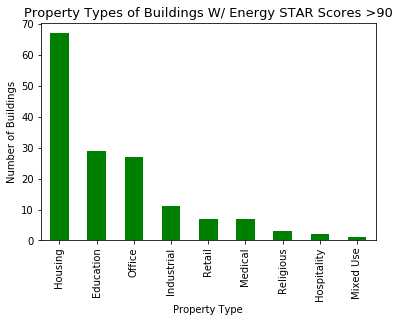

In [80]:
#visualize the data
the_best_dist = the_best_df['prop_type_cond'].value_counts()
the_best_dist.plot(kind='bar', x= 'Property Type', y= 'Number', color='green')

plt.title('Property Types of Buildings W/ Energy STAR Scores >90', size = 13)
plt.xlabel('Property Type')
plt.ylabel('Number of Buildings')

#### Quick side track -- I need to create a new dataframe that I can export to CSV for a widget on my website 
That is, I want to use a widget that wix provides for my article that takes a csv file and creates it into an interactive table that users can search in and scroll. 
This will allow my readers to search for buildings in the "naughty" and "nice" list 

In [17]:
#create a new dataframe to have just the info I want for my article export
the_best_export = pd.concat([the_best_df['property_name'], the_best_df['street_address'], the_best_df['energy_star_score']], axis=1)

In [18]:
#look at sample to make sure it is what I want
the_best_export.sample(10)

,property_name,street_address,energy_star_score
203,Springside,8000 CHEROKEE ST,99.0
168,Wilson W,1800 COTTMAN AVE,91.0
786,Holy Redeemer Health System - Verree Rd,8580 VERREE RD,91.0
348,Christ the King,3201 CHESTERFIELD RD,100.0
1470,crbuilding,1600-30 WASHINGTON AVE,97.0
906,Park Towne Place,2201 PARK TOWNE PL,92.0
790,IRS 30th Street Campus (165),2970 MARKET ST,92.0
925,23103-Philadelphia / Byberry Road,1251 BYBERRY RD,100.0
724,Giant Supermarket Grant Ave,2550 GRANT AVE,93.0
266,VILLAS DE HACE,1426-44 N 6TH ST,94.0


In [19]:
#rename for prettier export
the_best_export.columns=['Property Name', 'Address', 'Energy STAR Score']

In [20]:
#export the data as a CSV
the_best_export.to_csv('../data/thebestexport.csv')

#### Analysis 2(a)ii. Year built of the top 10
Now I want to explore what years buildings in the "top 10" were built in to see if there is a correlation of newer buildings to higher energy STAR scores

To me, this would make sense that there would be but I want to use the data to see if this is actually the case in practice

In [21]:
#year built
the_best_df['year_built_group'] = pd.cut(the_best_df['year_built'], bins=11, labels = ['1700-1800','1801-1850', '1851-1900', '1901-1925','1926-1950','1951-1975','1976-2000', '2001-2005', '2006-2010','2011-2015', '2016-2020'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
#see the distribution
the_best_df['year_built_group'].value_counts()

2011-2015    28
2016-2020    27
2001-2005    25
1951-1975    24
2006-2010    22
1976-2000    22
1926-1950    15
1901-1925     7
1851-1900     5
1801-1850     1
1700-1800     1
Name: year_built_group, dtype: int64

Text(0, 0.5, 'Number of Buildings')

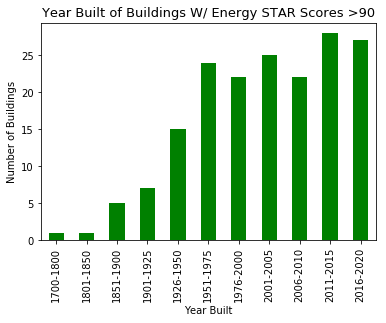

In [79]:
#visualize the distribution
the_best_yr_dist = the_best_df.groupby('year_built_group').size()
the_best_yr_dist.plot(kind='bar', color='green')

plt.title('Year Built of Buildings W/ Energy STAR Scores >90', size=13)
plt.xlabel('Year Built')
plt.ylabel('Number of Buildings')

I kept all the years groups even though it makes this graph slightly less attractive, for the sake of comparison to the bottom 10 as I suspect that more buildings will fill out those empty year groups -- this will hopefully create a stark difference in comparison visually when put side by side.

### Analysis 2(B): The bottom 10
Now I want to explore buildings with an energy STAR score under 10.


In [24]:
the_worst_df = yr2017_df[yr2017_df['energy_star_group'].isin(['0-10'])]

In [25]:
len(the_worst_df)

104

In [26]:
the_worst_df

,electricity_use_kbtu,objectid,street_address,property_name,opa_account_num,postal_code,num_of_buildings,year_built,primary_prop_type_epa_calc,total_floor_area_bld_pk_ft2,...,natural_gas_use_kbtu,fuel_oil_o2_use_kbtu,steam_use_kbtu,energy_star_score,site_eui_kbtuft2,source_eui_kbtuft2,water_use_all_kgal,total_ghg_emissions_mtco2e,notes,energy_star_group
1,23297409.0,4560,4100 CITY AVE,WPVI-TV,883080200,19131,1,2009,Office,69698.0,...,1242178.2,NaN,NaN,1.0,352.1,1068.3,2322.0,2650.4,NaN,0-10
21,6019894.0,3761,3401-15 MARKET ST,3401 Market St.,883072000,19104,1,1930,Office,90817.0,...,268111.9,NaN,1.818209e+07,1.0,269.4,452.1,1073.6,1889.3,NaN,0-10
44,7051007.2,4290,1512-14 SPRUCE ST,The Drake,888071440,19102,1,1929,Multifamily Housing,177067.0,...,1871879.9,NaN,1.588235e+07,3.0,140.1,244.0,10288.0,1936.2,NaN,0-10
52,20229017.8,4504,1400 S PENN SQ,73R49-Philadelphia Ritz Carlton,883702100,19102,2,1990,Hotel,350000.0,...,2670999.8,NaN,2.151224e+07,1.0,126.9,263.4,22987.0,3814.3,NaN,0-10
54,136877225.0,4514,3401-41 N BROAD ST,TEMPLE UNIVERSITY HOSPITAL SUPERBLOCK,777014000,19140,1,2000,Hospital (General Medical & Surgical),855189.0,...,223439.2,NaN,1.127025e+08,9.0,292.1,661.4,43735.5,22679.1,NaN,0-10
56,259361166.9,4540,3400 SPRUCE ST,Hospital of the University of Pennsylvania,773009000,19104,9,1913,Hospital (General Medical & Surgical),1791804.0,...,2119816.1,NaN,2.819489e+08,8.0,303.3,645.1,186787.5,47604.7,NaN,0-10
57,11282330.7,4409,230-34 W WASHINGTON SQ,Farm Journal,771005500,19107,1,1910,Medical Office,102855.0,...,10878.4,NaN,1.338741e+07,5.0,240.0,501.1,13108.7,2141.0,NaN,0-10
59,20144130.7,4603,1701-15 LOCUST ST,PLPH-Radisson Blu Warwick Hotel PA,883703900,19103,1,1926,Hotel,213500.0,...,2684409.4,NaN,1.804132e+07,2.0,191.4,411.1,20658.4,3575.1,NaN,0-10
91,32600438.5,4228,800-34 WALNUT ST 3,Walnut Towers,883400500,19106,1,1987,Medical Office,229920.0,...,NaN,NaN,4.696545e+06,9.0,162.2,469.8,11645.6,3928.2,NaN,0-10
93,19776248.8,4152,3600-90 WALNUT ST,Sansom Common,773566000,19104,1,1997,Hotel,259330.0,...,NaN,NaN,2.319405e+07,5.0,274.4,455.8,13999.3,5219.7,NaN,0-10


104 buildings are beyond not energy efficient

In [27]:
#create export list for article
worst_export = pd.concat([the_worst_df['property_name'], the_worst_df['street_address'], the_worst_df['energy_star_score']], axis=1)

In [28]:
#look at a sample to make sure it looks good
worst_export.sample(10)

,property_name,street_address,energy_star_score
1024,600 North Broad Association,1440 MOUNT VERNON ST,1.0
836,Erbe,1001-13 N 2ND ST,1.0
54,TEMPLE UNIVERSITY HOSPITAL SUPERBLOCK,3401-41 N BROAD ST,9.0
232,Miller,4301-19 OGDEN ST,2.0
1004,The Arch Condominiums,315 ARCH ST,1.0
832,Honor Foods,1801 N 5TH ST,2.0
894,382-The Summit at University City,3400L LANCASTER AVE,3.0
93,Sansom Common,3600-90 WALNUT ST,5.0
801,Dorchester Owners Association,224-30 W RITTENHOUSE SQ,4.0
605,The Moravian at Independence,121-35 WALNUT ST,1.0


In [29]:
#I want to rename the headers
worst_export.columns=['Property Name', 'Address', 'Energy STAR Score']

In [30]:
#Create CSV
worst_export.to_csv('../data/theworstexport.csv')

#### Analysis 2(b)i. Property type of the bottom 10

In [31]:
the_worst_df['prop_type_cond'] = the_worst_df['primary_prop_type_epa_calc'].map(categories2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
#see the distribution
the_worst_df['prop_type_cond'].value_counts()

Housing        46
Office         22
Education      18
Medical         6
Hospitality     5
Industrial      4
Retail          1
Name: prop_type_cond, dtype: int64

Text(0, 0.5, 'Number of Buildings')

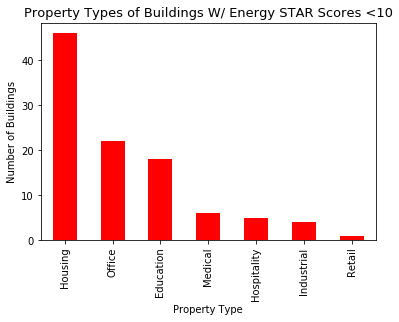

In [78]:
#visualize the data
the_worst_dist = the_worst_df['prop_type_cond'].value_counts()
the_worst_dist.plot(kind='bar', x= 'Property Type', y= 'Number', color='red')

plt.title('Property Types of Buildings W/ Energy STAR Scores <10', size=13)
plt.xlabel('Property Type')
plt.ylabel('Number of Buildings')

#### Analysis 2(b)ii. Year built of the bottom 10

In [34]:
#Building age
the_worst_df['year_built']

1       2009
21      1930
44      1929
52      1990
54      2000
56      1913
57      1910
59      1926
91      1987
93      1997
96      1980
98      1905
104     1956
112     1989
114     1970
120     1905
135     1899
138     1923
193     1929
196     1909
200     1937
204     1917
225     1980
227     1905
232     1967
233     1968
264     1905
278     1973
283     1915
306     1963
        ... 
814     2008
826     1965
832     1983
836     2009
845     1955
851     1929
874     1916
886     2012
889     1940
894     2015
900     1967
916     2014
965     1905
972     1900
992     1950
1004    1925
1005    1905
1008    1905
1009    1923
1017    1905
1022    1905
1024    2012
1025    1905
1026    1905
1027    1973
1035    1905
1037    1905
1047    1905
1049    1905
1479    1907
Name: year_built, Length: 104, dtype: int64

In [35]:
the_worst_df['year_built_group'] = pd.cut(the_worst_df['year_built'], bins=11, labels = ['1700-1800','1801-1850', '1851-1900', '1901-1925','1926-1950','1951-1975','1976-2000', '2001-2005', '2006-2010','2011-2015', '2016-2020'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
the_worst_df['year_built_group'].value_counts()

1700-1800    21
1851-1900    15
2016-2020    13
1976-2000    13
1801-1850    10
2001-2005     7
2011-2015     6
2006-2010     6
1901-1925     6
1951-1975     5
1926-1950     2
Name: year_built_group, dtype: int64

Text(0, 0.5, 'Number of Buildings')

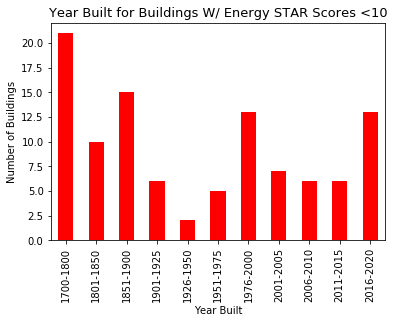

In [77]:
the_worst_year_dist = the_worst_df.groupby('year_built_group').size()
the_worst_year_dist.plot(kind='bar', color='red')
#create labels for the graph
plt.title('Year Built for Buildings W/ Energy STAR Scores <10', size=13)
plt.xlabel('Year Built')
plt.ylabel('Number of Buildings')

### Analysis 3: The top 25
I now want to look at the top 25 (buildings with an energy STAR score 75+ because that is what is considered energy STAR certified. Even though, the top 10 category shows the most efficient of efficient, any building over 75 is energy efficient. 

I first do this by grouping the energy star scores into 4 bins


In [38]:
yr2017_df['energy_star_quarter'] = pd.cut(yr2017_df['energy_star_score'], bins=4, labels = ['1-25','26-50', '51-75','76-100'])

In [39]:
top25df = yr2017_df[yr2017_df['energy_star_quarter'].isin(['76-100'])]

In [40]:
print(len(top25df))

408


In [57]:
top25df['year_built_group']= pd.cut(top25df['year_built'], bins=11, labels = ['1700-1800','1801-1850', '1851-1900', '1901-1925','1926-1950','1951-1975','1976-2000', '2001-2005', '2006-2010','2011-2015', '2016-2020'])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


408 buildings with an Energy STAR score over 75

#### Analysis 3(a) Year built of the 75+

Text(0, 0.5, 'Number of Buildings')

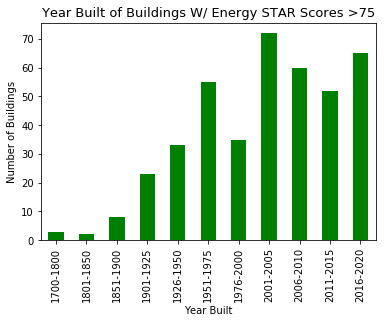

In [76]:
top25dist = top25df.groupby('year_built_group').size()
top25dist.plot(kind='bar', color='green')

#create labels for the graph
plt.title('Year Built of Buildings W/ Energy STAR Scores >75', size=13)
plt.xlabel('Year Built')
plt.ylabel('Number of Buildings')

#### Analysis 3(b) Property type of the top 25

In [59]:
#create dictionary for the property types
categories = {
    'Housing' : ['Multifamily Housing', 'Residential Care Facility', 'Other - Lodging/Residential', 'Residence Hall/Dormitory', 'Senior Care Community'],
    'Office' : ['Office', 'Financial Office'],
    'Science' : ['Other - Technology/Science', 'Data Center', 'Laboratory'],
    'Education' : ['K-12 School', 'College/University', 'Other - Education', 'Adult Education'],
    'Industrial' : ['Wastewater Treatment Plant', 'Other - Utility', 'Drinking Water Treatment & Distribution', 'Non-Refridgerated Warehouse', 'Distribution Center', 'Manufacturing/Industrial Plant', 'Self-Storage Facility', 'Refrigerated Warehouse'],
    'Hospitality' : ['Hotel'],
    'Retail' : ['Enclosed Mall', 'Wholesale Club/Supercenter', 'Food Sales', 'Bar/Nightclub', 'Automobile Dealership', 'Mailing Center/Post Office', 'Restaurant', 'Food Service', 'Retail Store','Supermarket/Grocery Store', 'Other - Mall','Strip Mall', 'Repair Services (Vehicle, Shoe, Locksmith, etc.)'],
    'Medical' : ['Other - Specialty Hospital', 'Hospital (General Medical & Surgical)', 'Outpatient Rehabilitation/Physical Therapy', 'Ambulatory Surgical Center', 'Medical Office'],
    'Religious' : ['Worship Facility'],
    'Sports/Entertainment' : ['Stadium (Open)', 'Other - Recreation', 'Ice/Curling Rink', 'Movie Theater', 'Fitness Center/Health Club/Gym', 'Stadium (Closed)', 'Performing Arts'],
    'Convention Center' : ['Convention Center'],
    'Public Services/Gov' : ['Other - Public Services', 'Social/Meeting Hall', 'Museum', 'Library', 'Courthouse'],
    'Prison' : ['Prison/Incarceration'],
    'Parking' : ['Parking'],
    'Mixed Use' : ['Mixed Use Property'],
    'Other': ['Other']
}




In [60]:
categories2={}
for k, vlist in categories.items():
    for v in vlist:
        categories2[v]=k

In [61]:
top25df['prop_type_cond'] = top25df['primary_prop_type_epa_calc'].map(categories2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
top25df['prop_type_cond'].value_counts()

Housing        142
Office          93
Education       70
Industrial      24
Retail          22
Medical         10
Hospitality      6
Religious        4
Mixed Use        3
Name: prop_type_cond, dtype: int64

Text(0, 0.5, 'Number of Buildings')

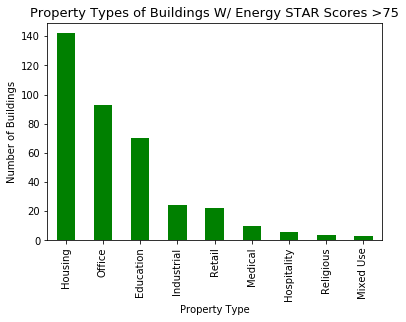

In [75]:
top25proptypedist = top25df['prop_type_cond'].value_counts()
top25proptypedist.plot(kind='bar', x= 'Property Type', y= 'Number', color='green')
plt.title('Property Types of Buildings W/ Energy STAR Scores >75', size =13)
plt.xlabel('Property Type')
plt.ylabel('Number of Buildings')

## Analysis 4: Bottom 25
For the sake of presenting an even story-- I want to do the same analysis but with the bottom 25 energy STAR scores


In [64]:
bottom25df = yr2017_df[yr2017_df['energy_star_quarter'].isin(['1-25'])]

In [65]:
print(len(bottom25df))

184


184 buildings in the bottom 25

In [66]:
bottom25df['prop_type_cond'] = bottom25df['primary_prop_type_epa_calc'].map(categories2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
bottom25df['prop_type_cond'].value_counts()

Housing        79
Education      41
Office         29
Hospitality    10
Medical        10
Industrial      6
Retail          4
Name: prop_type_cond, dtype: int64

Text(0, 0.5, 'Number of Buildings')

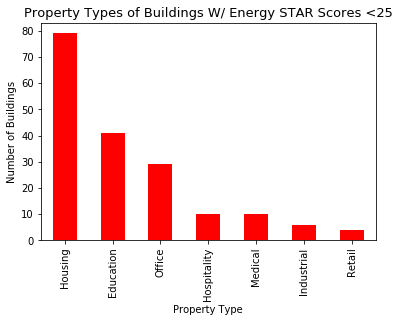

In [74]:
bottom25proptypedist = bottom25df['prop_type_cond'].value_counts()
bottom25proptypedist.plot(kind='bar', x= 'Property Type', y= 'Number', color='red')

plt.title('Property Types of Buildings W/ Energy STAR Scores <25', size =13)
plt.xlabel('Property Type')
plt.ylabel('Number of Buildings')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Number of Buildings')

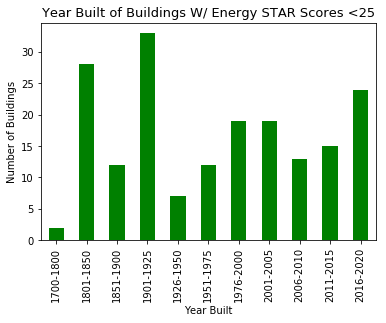

In [73]:
bottom25df['year_built_group']=pd.cut(bottom25df['year_built'], bins=11, labels = ['1700-1800','1801-1850', '1851-1900', '1901-1925','1926-1950','1951-1975','1976-2000', '2001-2005', '2006-2010','2011-2015', '2016-2020'])
bottom25dist = bottom25df.groupby('year_built_group').size()
bottom25dist.plot(kind='bar', color='green')
plt.title('Year Built of Buildings W/ Energy STAR Scores <25', size=13)
plt.xlabel('Year Built')
plt.ylabel('Number of Buildings')